In [1]:
import numpy as np
import pandas as pd

import pickle
import matplotlib.pyplot as plt
import matplotlib

In [2]:
data_path = '../data/'
train = pd.read_csv(data_path + 'train.csv')
test = pd.read_csv(data_path + 'test.csv')
songs = pd.read_csv(data_path + 'songs1.csv')
members = pd.read_csv(data_path + 'members.csv')

song_cols = ['song_id', 'artist_name', 'genre_ids', 'artist_name', 'composer',\
            'lyricist', 'language', 'song_name', 'song_country', 'song_year']

train = train.merge(songs[song_cols], on='song_id', how='left')
test = test.merge(songs[song_cols], on='song_id', how='left')

members['registration_year'] = members['registration_init_time'].apply(lambda x: int(str(x)[0:4]))
members['registration_month'] = members['registration_init_time'].apply(lambda x: int(str(x)[4:6]))
members['registration_date'] = members['registration_init_time'].apply(lambda x: int(str(x)[6:8]))

members['expiration_year'] = members['expiration_date'].apply(lambda x: int(str(x)[0:4]))
members['expiration_month'] = members['expiration_date'].apply(lambda x: int(str(x)[4:6]))
members['expiration_date'] = members['expiration_date'].apply(lambda x: int(str(x)[6:8]))
member = members.drop(['registration_year', 'expiration_year'], axis=1)

members_cols = members.columns
train = train.merge(members[members_cols], on='msno', how='left')
test = test.merge(members[members_cols], on='msno', how='left')

train = train.fillna(-1)
test = test.fillna(-1)

In [5]:
print(len(train[train.target == 1]), len(train[train.target == 0]))

(3714656, 3662762)


In [94]:
def get_dict(data, col_name):
    dict ={}
    for key in data[col_name]:
        if key == '-1' or key == -1:
            key = 'others'
        dict[key] = dict.get(key, 0) + 1
    return dict
def plot_bar(data, name):
    plt.bar(list(data['train'].keys()), data['train'].values(),\
            color='g', alpha=0.5, label='train_set')  
    plt.bar(list(data['test'].keys()), data['test'].values(), \
            color='r', alpha=0.5, label='test_set')
    plt.title("%s Year Histogram" % (name))
    plt.xlabel("Year")
    plt.ylabel("Frequency")
    plt.show()
def plot_diff_percent_bar(train, test, name):
    plt.figure(figsize=(20,5))
    matplotlib.rcParams.update({'font.size': 22})
    
    train_sum, test_sum = np.sum(list(train.values())),\
                    np.sum(list(test.values()))    
    train_data = np.array([x / train_sum for x in sorted(list(train.values()))])
    test_data = np.array([x / test_sum for x in sorted(list(test.values()))])
    data = test_data - train_data
    bar_width = 1
    opacity = 0.8
    index = np.arange(len(data))
    plt.bar(index, data, bar_width,
                 alpha=opacity,
                 color='b',
                 label='test_data - train_data')
    plt.title("the difference percentage between testing set and training set %s Year Histogram(test - train)" % (name))
    plt.xlabel("Year")
    plt.ylabel("percentage")
    plt.show()
def plot_percent_bar(data, name):
    plt.figure(figsize=(20,5))
    matplotlib.rcParams.update({'font.size': 22})
    
    data_sum = np.sum(list(data.values()))  
    items = sorted(data.items())
    data = np.array([float(x[1]) / data_sum for x in items ])

    bar_width = 1
    opacity = 0.8
    keys = [x[0] for x in items]
    index = np.arange(len(items))
    plt.bar(index, data, bar_width,
                 alpha=opacity,
                 color='b')
    plt.title("the  percentage %s Year Histogram" % (name))
    plt.xticks(index, keys)
    plt.xlabel("Year")
    plt.ylabel("percentage")
    plt.show()

def plot_bar(data, name):
    plt.figure(figsize=(20,5))
    matplotlib.rcParams.update({'font.size': 22})
    
    items = sorted(data.items())
    data = np.array([ x[1] for x in items ])

    bar_width = 5
    opacity = 0.8
    keys = [x[0] for x in items]
    index = np.arange(len(items))
    plt.bar(index, data, bar_width,
                 alpha=opacity,
                 color='b')
    plt.title("the  percentage %s Year Histogram" % (name))
    plt.xticks(index, keys)
    plt.xlabel("Year")
    plt.ylabel("percentage")
    plt.show()    

def plot_one_bar(data, name):
    plt.bar(list(data.keys()), data.values(),\
            width = .4, color='g', alpha=0.5)  
    plt.title("%s Histogram" % (name))
    plt.xlabel('value')
    plt.ylabel("Frequency")
    plt.ylim(0, max(data.values()) * 1.3)
    for key in data:
        val = data[key]
        plt.text(key - .25, val - 2, str(val), color='black', fontweight='bold')
    plt.show()

In [6]:
def output_song_info():
    plot_percent_bar(get_dict(train, 'song_year'), get_dict(test, 'song_year'), 'song_year')

In [7]:
set1, set2 = set(train['msno']), set(test['msno'])

In [8]:
print (len(set1), len(train), len(set2), len(test))

(30755, 7377418, 25131, 2556790)


In [9]:
25131 * 100 / 2556790

0

In [10]:
overlap_uid = set1.intersection(set2)

In [11]:
unseen_uid = set2 - overlap_uid

In [43]:
unseen = test[test.msno.isin(unseen_uid)]
seen = test[~test.msno.isin(unseen_uid)]

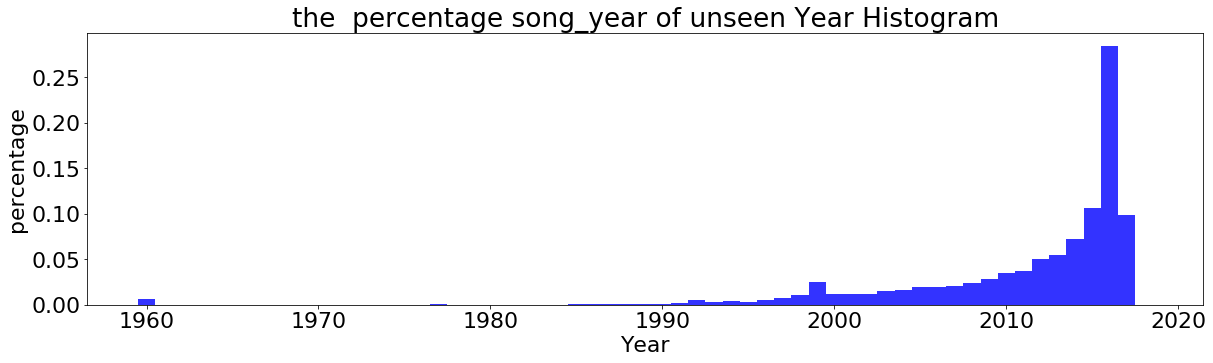

In [49]:
plot_percent_bar(get_dict(unseen, 'song_year'), 'song_year of unseen')

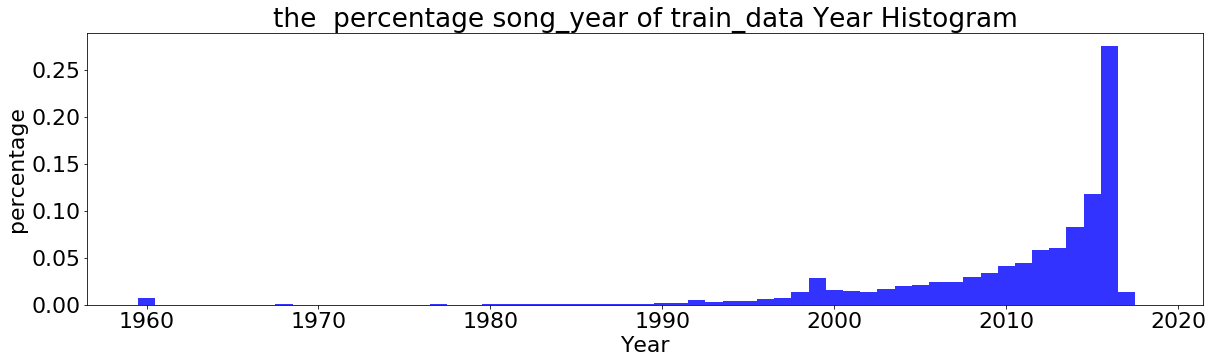

In [50]:
plot_percent_bar(get_dict(train, 'song_year'), 'song_year of train_data')

In [68]:
d1 = get_dict(train, 'song_country')

In [85]:
fews = {}
for d in sorted(d1):
    if d1[d] < 30:
        fews[d] = d1[d]

In [87]:
fews_table = train[train['song_country'].isin(fews)]

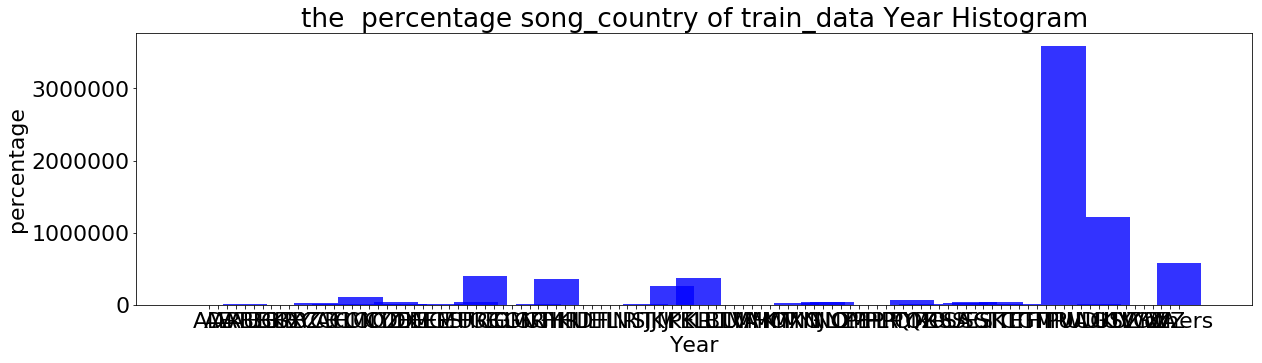

In [79]:
plot_bar(d1, 'song_country of train_data')

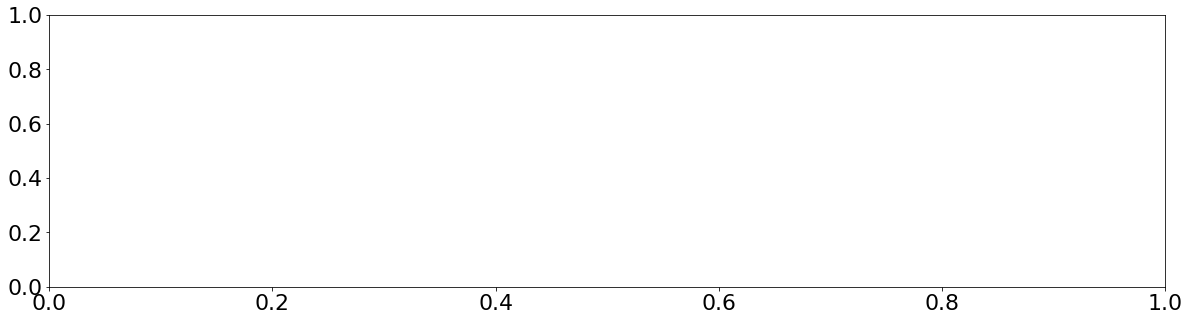

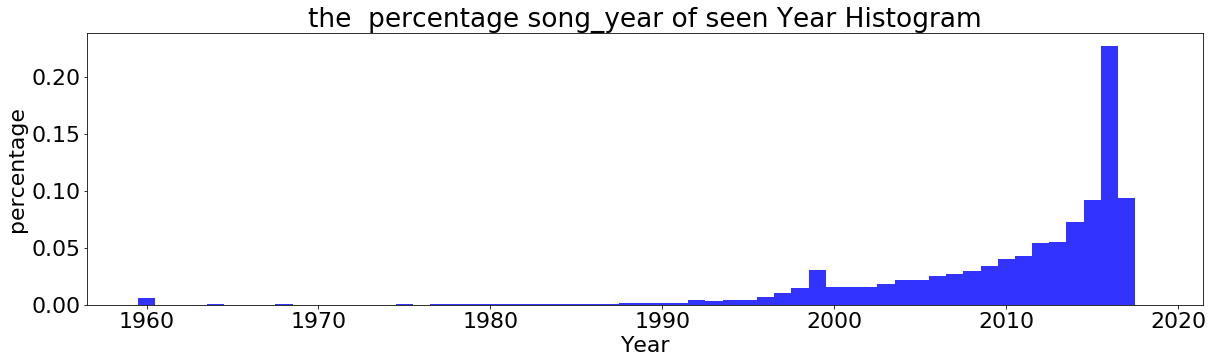

In [52]:
plot_percent_bar(get_dict(seen, 'song_year'), 'song_year of seen')

In [29]:
print len(unseen), type(unseen)

184018 <class 'pandas.core.frame.DataFrame'>


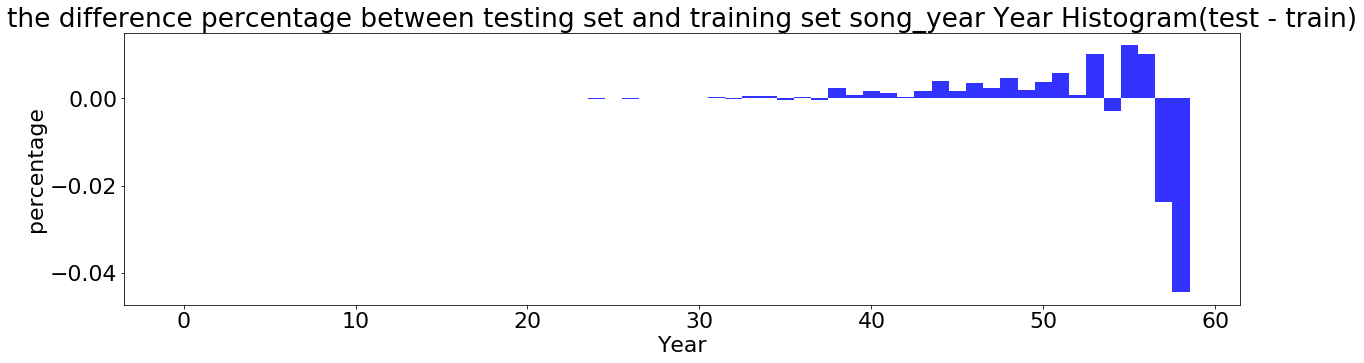

In [124]:
output_song_info()

In [ ]:
targets = get_dict('registration_year')

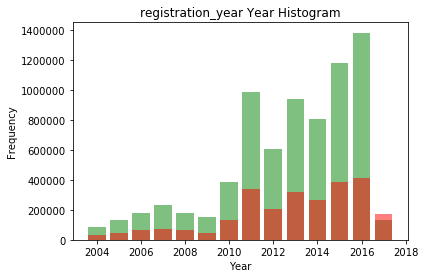

In [148]:
reg_year = get_dict('registration_year')
plot_bar(reg_year, 'registration_year')

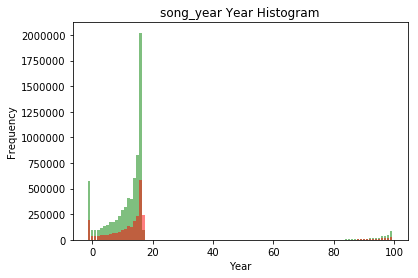

In [62]:
song_year = get_dict('song_year')
plot_bar(song_year, 'song_year')

In [90]:
dict = {}
for song, singer, x, y in zip(train['song_name'], train['artist_name'], train['isrc'],\
                                   train['target']):
    if x != '' and x != -1 and not pd.isnull(x):
        yr = int(str(x)[5:7])
        if yr not in dict:
            dict[yr] = {}
        dict[yr][song, singer, x, y] = 1

In [123]:
song_country = get_dict('song_country')

In [114]:
print (song_country['train'].keys())

dict_keys(['BE', 'GM', 'MX', 'PL', 'MO', 'LB', 'EG', 'NJ', 'GL', 'AT', 'QM', 'MA', 'BR', 'TR', 'NG', 'UZ', 'BY', 'IF', 'GB', 'NO', 'DM', 'IT', 'PT', 'SI', 'PR', 'TG', 'EE', 'CM', 'KR', 'HU', 'FI', 'FR', 'MK', 'JM', 'YW', 'KI', 'BG', 'AD', 'WW', 'PY', 'BX', 'JK', 'KE', 'UA', 'UK', 'EU', 'LT', 'IS', 'GT', 'SA', 'VG', 'NL', 'DE', 'IN', 'AU', 'CH', 'GY', 'EM', 'TW', 'SG', 'LU', 'AR', 'TP', 'NZ', 'SE', 'TH', 'QZ', 'IL', 'CN', 'IR', 'OM', 'CB', 'MY', 'GD', 'TC', 'AE', 'RS', 'ZZ', 'US', 'PE', 'MH', 'RU', 'TM', 'TE', 'CZ', 'LV', 'JP', 'UY', 'DK', 'MT', 'PH', 'IE', 'CA', 'SK', 'ID', 'GN', 'CY', 'HK', 'BZ', 'CO', 'ES', 'HR', 'GR', 'RO', 'UG', 'CL', 'UD', 'ZA', 'BK'])


In [6]:
a1 = 0.03 * 0.98**2
a2 = 0.97 * 0.04**2

In [89]:
targets = get_dict(train, 'target')

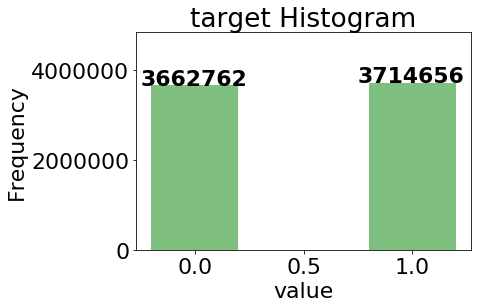

In [112]:
plot_one_bar(targets, 'target')

In [92]:
print targets

{0: 3662762, 1: 3714656}
